# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#create empty lists
name = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind_speed =[]

In [4]:
record_counter = 0
set_counter = 0




#URL for GET requests to retrieve data
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key

print('Beginning Data Retrieval')
print('------------------------')
for city in cities:
    query_url = url + "&q=" + city
    
    #Get weather data
    
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0
    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))    
    
    try:
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind_speed.append(response['wind']['speed'])
        
#wait a second in loop to not over exceed limit of API

        time.sleep(1.01)
    
    except(KeyError):
        print(f'City not found.')
        pass




Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | punta arenas
Processing record 2 of set 0 | naryan-mar
Processing record 3 of set 0 | coquimbo
Processing record 4 of set 0 | faanui
Processing record 5 of set 0 | new norfolk
Processing record 6 of set 0 | tahe
Processing record 7 of set 0 | longyearbyen
Processing record 8 of set 0 | port alfred
Processing record 9 of set 0 | nyurba
Processing record 10 of set 0 | thompson
Processing record 11 of set 0 | pisco
Processing record 12 of set 0 | luderitz
Processing record 13 of set 0 | ikom
Processing record 14 of set 0 | olafsvik
Processing record 15 of set 0 | jamestown
Processing record 16 of set 0 | husavik
Processing record 17 of set 0 | mys shmidta
City not found.
Processing record 18 of set 0 | kushiro
Processing record 19 of set 0 | avarua
Processing record 20 of set 0 | rikitea
Processing record 21 of set 0 | mataura
Processing record 22 of set 0 | lompoc
Processing record 23 of set 0 | kahta
Proces

Processing record 37 of set 3 | vila
Processing record 38 of set 3 | pacific grove
Processing record 39 of set 3 | krasnoznamensk
Processing record 40 of set 3 | kruisfontein
Processing record 41 of set 3 | laguna
Processing record 42 of set 3 | bayir
Processing record 43 of set 3 | omsukchan
Processing record 44 of set 3 | mariental
Processing record 45 of set 3 | amderma
City not found.
Processing record 46 of set 3 | siavonga
Processing record 47 of set 3 | vila velha
Processing record 48 of set 3 | aswan
Processing record 49 of set 3 | namalenga
Processing record 50 of set 3 | umarkot
Processing record 0 of set 4 | atyuryevo
City not found.
Processing record 1 of set 4 | margate
Processing record 2 of set 4 | berlevag
Processing record 3 of set 4 | tiksi
Processing record 4 of set 4 | touros
Processing record 5 of set 4 | xuddur
Processing record 6 of set 4 | parva
Processing record 7 of set 4 | batemans bay
Processing record 8 of set 4 | falun
Processing record 9 of set 4 | saint-

Processing record 28 of set 7 | buchanan
Processing record 29 of set 7 | saleaula
City not found.
Processing record 30 of set 7 | ushtobe
Processing record 31 of set 7 | naze
Processing record 32 of set 7 | emirdag
Processing record 33 of set 7 | turukhansk
Processing record 34 of set 7 | nanortalik
Processing record 35 of set 7 | mahanje
Processing record 36 of set 7 | farafangana
Processing record 37 of set 7 | columbus
Processing record 38 of set 7 | omboue
Processing record 39 of set 7 | northam
Processing record 40 of set 7 | ekhabi
Processing record 41 of set 7 | axim
Processing record 42 of set 7 | gamba
Processing record 43 of set 7 | marsaxlokk
Processing record 44 of set 7 | lerwick
Processing record 45 of set 7 | belushya guba
City not found.
Processing record 46 of set 7 | betioky
Processing record 47 of set 7 | namie
Processing record 48 of set 7 | san cristobal
Processing record 49 of set 7 | port lincoln
Processing record 50 of set 7 | kampot
Processing record 0 of set 8

Processing record 17 of set 11 | coromandel
Processing record 18 of set 11 | tawnat
City not found.
Processing record 19 of set 11 | kangaatsiaq
Processing record 20 of set 11 | sisimiut
Processing record 21 of set 11 | evensk
Processing record 22 of set 11 | edd
Processing record 23 of set 11 | dipkarpaz
City not found.
Processing record 24 of set 11 | raul soares
Processing record 25 of set 11 | verkhnyaya toyma
Processing record 26 of set 11 | zolotinka
City not found.
Processing record 27 of set 11 | sorvag
City not found.
Processing record 28 of set 11 | walvis bay
Processing record 29 of set 11 | kenora
Processing record 30 of set 11 | san andres
Processing record 31 of set 11 | paraiso
Processing record 32 of set 11 | borgomanero
Processing record 33 of set 11 | marystown
Processing record 34 of set 11 | constitucion
Processing record 35 of set 11 | buritis
Processing record 36 of set 11 | saveh
Processing record 37 of set 11 | dzhebariki-khaya
Processing record 38 of set 11 | p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#export city data into csv
#make dictionary of lists

# dictionary of lists   
weather_dict = {'City': name, 'Cloudiness': cloudiness, 'Country': country, 'Date': date, 'Humidity': humidity, 'Temperature': temp, 'Latitude': lat, 'Longitude': lng, 'Wind Speed': wind_speed}   
       

city_df = pd.DataFrame(weather_dict)  

city_df


   
# saving the dataframe  
city_df.to_csv("../output_data/cities(out).csv")




In [6]:
# Use describe to get the max and see if its above 100 for humidity 
city_df.describe()

,Cloudiness,Date,Humidity,Temperature,Latitude,Longitude,Wind Speed
count,588.000000,5.880000e+02,588.000000,588.000000,588.000000,588.000000,588.000000
mean,53.897959,1.612553e+09,72.906463,50.222908,20.825265,16.302480,8.448146
std,40.675428,2.040991e+02,20.690790,33.141446,33.623447,89.476576,5.731192
min,0.000000,1.612552e+09,11.000000,-42.570000,-54.800000,-175.200000,0.270000
25%,3.000000,1.612553e+09,65.000000,30.200000,-7.686675,-60.098700,4.052500
50%,72.000000,1.612553e+09,78.000000,61.015000,25.674450,19.130550,6.910000
75%,97.000000,1.612553e+09,88.000000,77.485000,49.887550,85.786750,11.525000
max,100.000000,1.612553e+09,100.000000,98.600000,78.218600,179.316700,38.030000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
if len(city_df.loc[city_df["Humidity"] >= 100]) > 0:
    clean_city_df = pd.DataFrame.copy(city_df).drop(city_df.loc[city_df["Humidity"] >100].index)
else:
    clean_city_df = pd.DataFrame.copy(city_df)

# print out lenghts of original and clean data to see if the values were dropped or not 
len(city_df), len(clean_city_df)

(588, 588)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

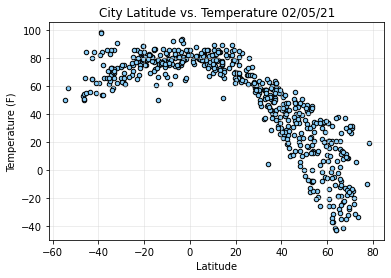

In [9]:
clean_city_df.plot(kind='scatter', x='Latitude', y='Temperature', c='LightSkyBlue', edgecolor='black')
plt.title('City Latitude vs. Temperature '+ datetime.date.fromtimestamp(clean_city_df["Date"][0]).strftime("%m/%d/%y"))
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(color='lightgrey',
               alpha=0.5)
plt.savefig("../output_data/City Latitude vs. Temperature.png")


* As latitude increases, temperature decreases, showing that temperatures are usually colder in cities north of the equator.

## Latitude vs. Humidity Plot

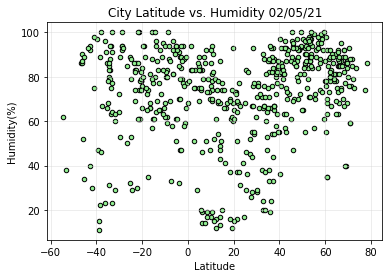

In [10]:
clean_city_df.plot(kind='scatter', x='Latitude', y='Humidity', c='LightGreen', edgecolor='black')
plt.title('City Latitude vs. Humidity '+ datetime.date.fromtimestamp(clean_city_df["Date"][0]).strftime("%m/%d/%y"))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)') 
plt.grid(color='lightgrey',
               alpha=0.5)
plt.savefig("../output_data/City Latitude vs. Humidity.png")

* Humidity levels show more variance at the equator and southern hempisphere. As latitude increases north of the equator, humidity also increases. 

## Latitude vs. Cloudiness Plot

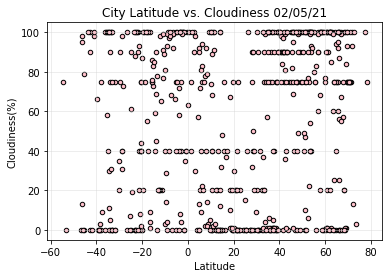

In [11]:
clean_city_df.plot(kind='scatter', x='Latitude', y='Cloudiness', c='Pink', edgecolor='black')
plt.title('City Latitude vs. Cloudiness '+ datetime.date.fromtimestamp(clean_city_df["Date"][0]).strftime("%m/%d/%y"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)') 
plt.grid(color='lightgrey',
               alpha=0.5)
plt.savefig("../output_data/City Latitude vs. Cloudiness.png")

* The effect of latitude on cloudiness greatly varies.

## Latitude vs. Wind Speed Plot

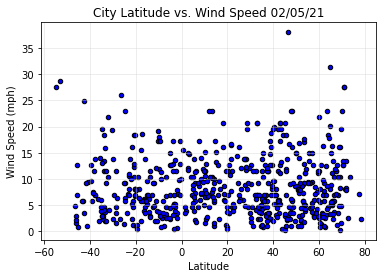

In [12]:
clean_city_df.plot(kind='scatter',x='Latitude',y='Wind Speed', c='Blue', edgecolor = "black")
plt.title('City Latitude vs. Wind Speed '+ datetime.date.fromtimestamp(clean_city_df["Date"][0]).strftime("%m/%d/%y"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(color='lightgrey',
               alpha=0.5)
plt.savefig("../output_data/City Latitude vs. Wind Speed.png")

* Wind speed varies greatly across latitudes. There are notable outliers in wind speeds as latitudes approach extremities of the North and South Poles.

## Linear Regression

In [13]:
#Break up northern and southern hemispheres
north_hem = clean_city_df.loc[clean_city_df["Latitude"] > 0]
south_hem = clean_city_df.loc[clean_city_df["Latitude"]< 0]

In [14]:
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


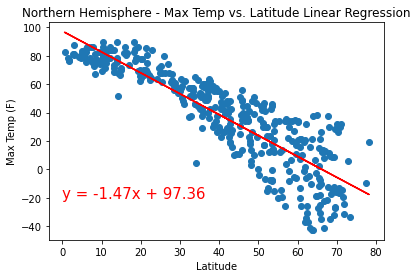

In [15]:
equation = linear_regression(north_hem["Latitude"], north_hem["Temperature"])
annotate(equation, 0, -20)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
# Save the figure
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.48


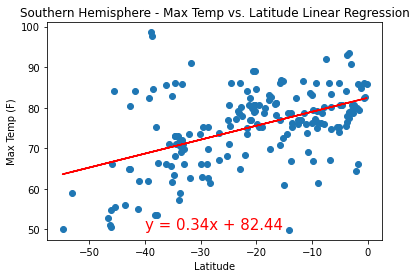

In [16]:
equation = linear_regression(south_hem["Latitude"], south_hem["Temperature"])
annotate(equation, -40, 50)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../output_data/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

* In the Northern hempishere, max temperatures decrease as latitudes increase. In the Southern hemisphere, max temperatures are positively correlated with latitude. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.41


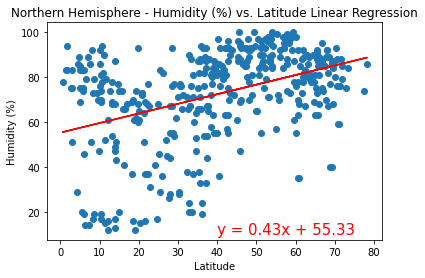

In [17]:
equation = linear_regression(north_hem["Latitude"], north_hem["Humidity"])
annotate(equation, 40, 10)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.14


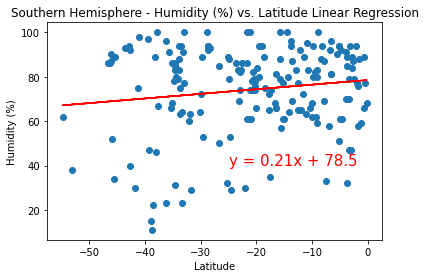

In [18]:
equation = linear_regression(south_hem["Latitude"], south_hem["Humidity"])
annotate(equation, -25, 40)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

*There is a positive correlation between latitude and humidity in both the Northern and Southern hemispheres, though this correlation is less strong in the Southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.29


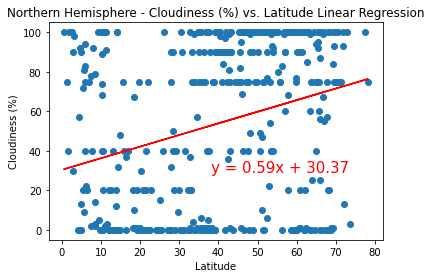

In [19]:
equation = linear_regression(north_hem["Latitude"], north_hem["Cloudiness"])
annotate(equation, 38, 29)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.17


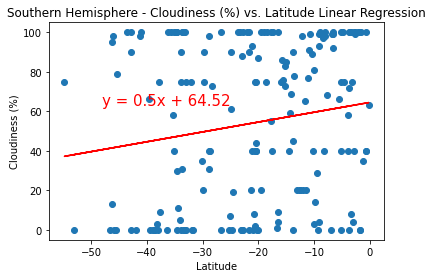

In [20]:
equation = linear_regression(south_hem["Latitude"], south_hem["Cloudiness"])
annotate(equation, -48, 63)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

*There is a positive correlation between cloudiness and latitude in both the Northern and Southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.01


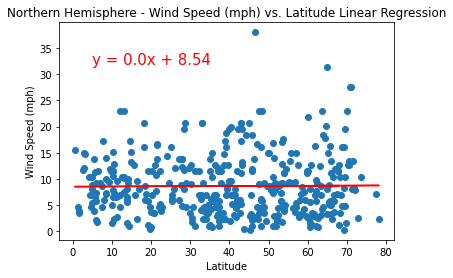

In [21]:
equation = linear_regression(north_hem["Latitude"], north_hem["Wind Speed"])
annotate(equation, 5, 32)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.12


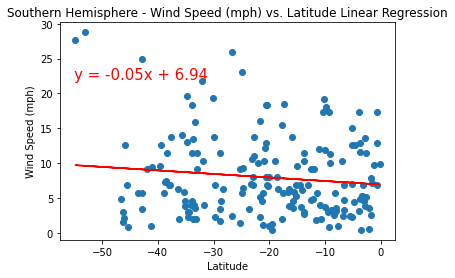

In [22]:
equation = linear_regression(south_hem["Latitude"], south_hem["Wind Speed"])
annotate(equation, -55, 22)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

*There are minimal correlations between wind speed and latitude.